# Do-It-Yourself

In this session, we will practice your skills in mapping with Python. Fire up a notebook you can edit interactively, and let's do this!

## Data preparation

### Polygons

For this section, you will have to push yourself out of the comfort zone when it comes to sourcing the data. As nice as it is to be able to pull a dataset directly from the web at the stroke of a url address, most real-world cases are not that straight forward. Instead, you usually have to download a dataset manually and store it locally on your computer before you can get to work.

We are going to use data from the Consumer Data Research Centre (CDRC) about Liverpool, in particular an extract from the Census. You can download a copy of the data at:

```{admonition} Important
You will need a username and password to download the data. Create it for free at:

> [https://data.cdrc.ac.uk/user/register](https://data.cdrc.ac.uk/user/register)
```

> [Liverpool Census'11 Residential data pack download](https://data.cdrc.ac.uk/system/files/Census_Residential_Data_Pack_2011/Census_Residential_Data_Pack_2011_E08000012.zip)

Once you have the `.zip` file on your computer, right-click and "Extract all". The resulting folder will contain all you need. For the sake of the example, let's assume you place the resulting folder in the same location as the notebook you are using. If that is the case, you can load up a `GeoDataFrame` of Liverpool neighborhoods with:

```python
import geopandas
liv = geopandas.read_file("Census_Residential_Data_Pack_2011_E08000012/data/Census_Residential_Data_Pack_2011/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")
```

### Lines

For a line layer, we are going to use a different bit of `osmnx` functionality that will allow us to extract all the highways

In [ ]:
bikepaths = osmnx.geocode_to_gdf("Liverpool, UK", )

In [5]:
bikepaths = osmnx.graph_from_place("Liverpool, UK", network_type="bike")

In [8]:
len(bikepaths)

23460

### Points

For points, we will use an analogue of the POI layer we have used in the [Lab](lab_C): pubs in Liverpool, as recorded by OpenStreetMap.

Let's import `osmnx`:

In [1]:
import osmnx

And make a similar query to retrieve the table:

In [2]:
pubs = osmnx.pois.pois_from_place("Liverpool, UK",
                                  tags={"amenity": "pub"}
                                 )

## Tasks



With those three layers, try to complete the following tasks:

- Make a map of the Liverpool neighborhoods that includes the following characteristics:

    - Features a title
    - Does not include axes frame
    - It has a figure size of 10 by 11
    - Polygons are all in color `"#525252"` and 50% transparent
    - Boundary lines ("edges") have a width of 0.3 and are of color `"#B9EBE3"`
    - Includes a basemap with the [Stamen watercolor theme](https://contextily.readthedocs.io/en/latest/providers_deepdive.html#Overview-of-built-in-providers)
    
```{Note}
Not all of the requirements above are equally hard to achieve. If you can get some of them but not all of them, that's also great!
```

### Non-spatial manipulations

Once we have joined spatial and non-spatial data, we can use the techniques learned in manipulating and slicing non-spatial tables to create much richer maps. In particular, let us recall the example we worked through in the previous session in which we were selecting rows based on their population characteristics. In addition to being able to to select them, now we will also be able to visualize them in maps.

For example, let us select again the ten smallest areas of Liverpool (note how we pass a number to `head` to keep that amount of rows):

In [36]:
smallest = geo_pop.sort_values('Total').head(10)

Now we can make a map of Liverpool and overlay on top of them these areas:

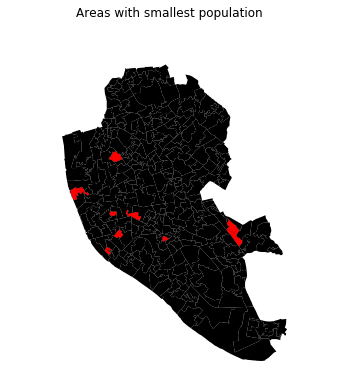

In [37]:
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
geo_pop.plot(facecolor='black', linewidth=0.025, ax=ax)
# Smallest areas
smallest.plot(alpha=1, facecolor='red', linewidth=0, ax=ax)
ax.set_axis_off()
f.suptitle('Areas with smallest population')
plt.axis('equal')
plt.show()

---

**[Optional exercise]**

Create a map of Liverpool with the two largest areas for each of the different population subgroups in a different color each.

---

---

**[Optional exercise]**

Create a map with the polygons of Liverpool in the background and overlay on top of them their centroids.

<!--
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
for poly in geo_pop['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='black', linewidth=0.025)
# Smallest areas
cents.plot(axes=ax)
ax.set_axis_off()
f.suptitle('Areas with smallest population')
plt.axis('equal')
plt.show()
-->

---

---

**[Optional exercise]**

This one is fairly advanced, so do not dispair if you cannot solve it. Find in which polygons the named places in `namp` fall into. Return, for each named place, the LSOA code in which it is located.

<!--
pip = []
for id, place in namp.iterrows():
    for pid, poly in geo_pop.iterrows():
        if poly.geometry.contains(place.geometry):
            pip.append((place.htmlname, poly.LSOA11CD))
pip = pd.DataFrame(pip, columns=['NamePlace', 'LSOA'])
-->

---

---

**[Optional exercise]**

Generate a map of the Liverpool polygons in black and overlay on top of them yellow buffers of 250 metres around each centroid.

<!--
f, ax = plt.subplots(1)
b250 = namp.buffer(250)
# Plot polys
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, edgecolor='black', facecolor='black')
# Plot buffer
for poly in buf:
    gpd.plotting.plot_multipolygon(ax, poly, linewidth=0, facecolor='yellow')
plt.axis('equal')
plt.show()
-->
